## 1.2. Data Granularity

---

### Setup

---

In [31]:
import sys
sys.path.insert(1, '../utils')
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds 

data = pd.read_csv('heart_failure_clinical_records_dataset.csv', parse_dates=True, infer_datetime_format=True)
data = data.astype({'anaemia': bool, 'diabetes': bool, 'high_blood_pressure': bool, 'sex': bool, 'smoking': bool, 'DEATH_EVENT': bool})
values = {'nr records': data.shape[0], 'nr variables': data.shape[1]}

### Atomic granularity

---

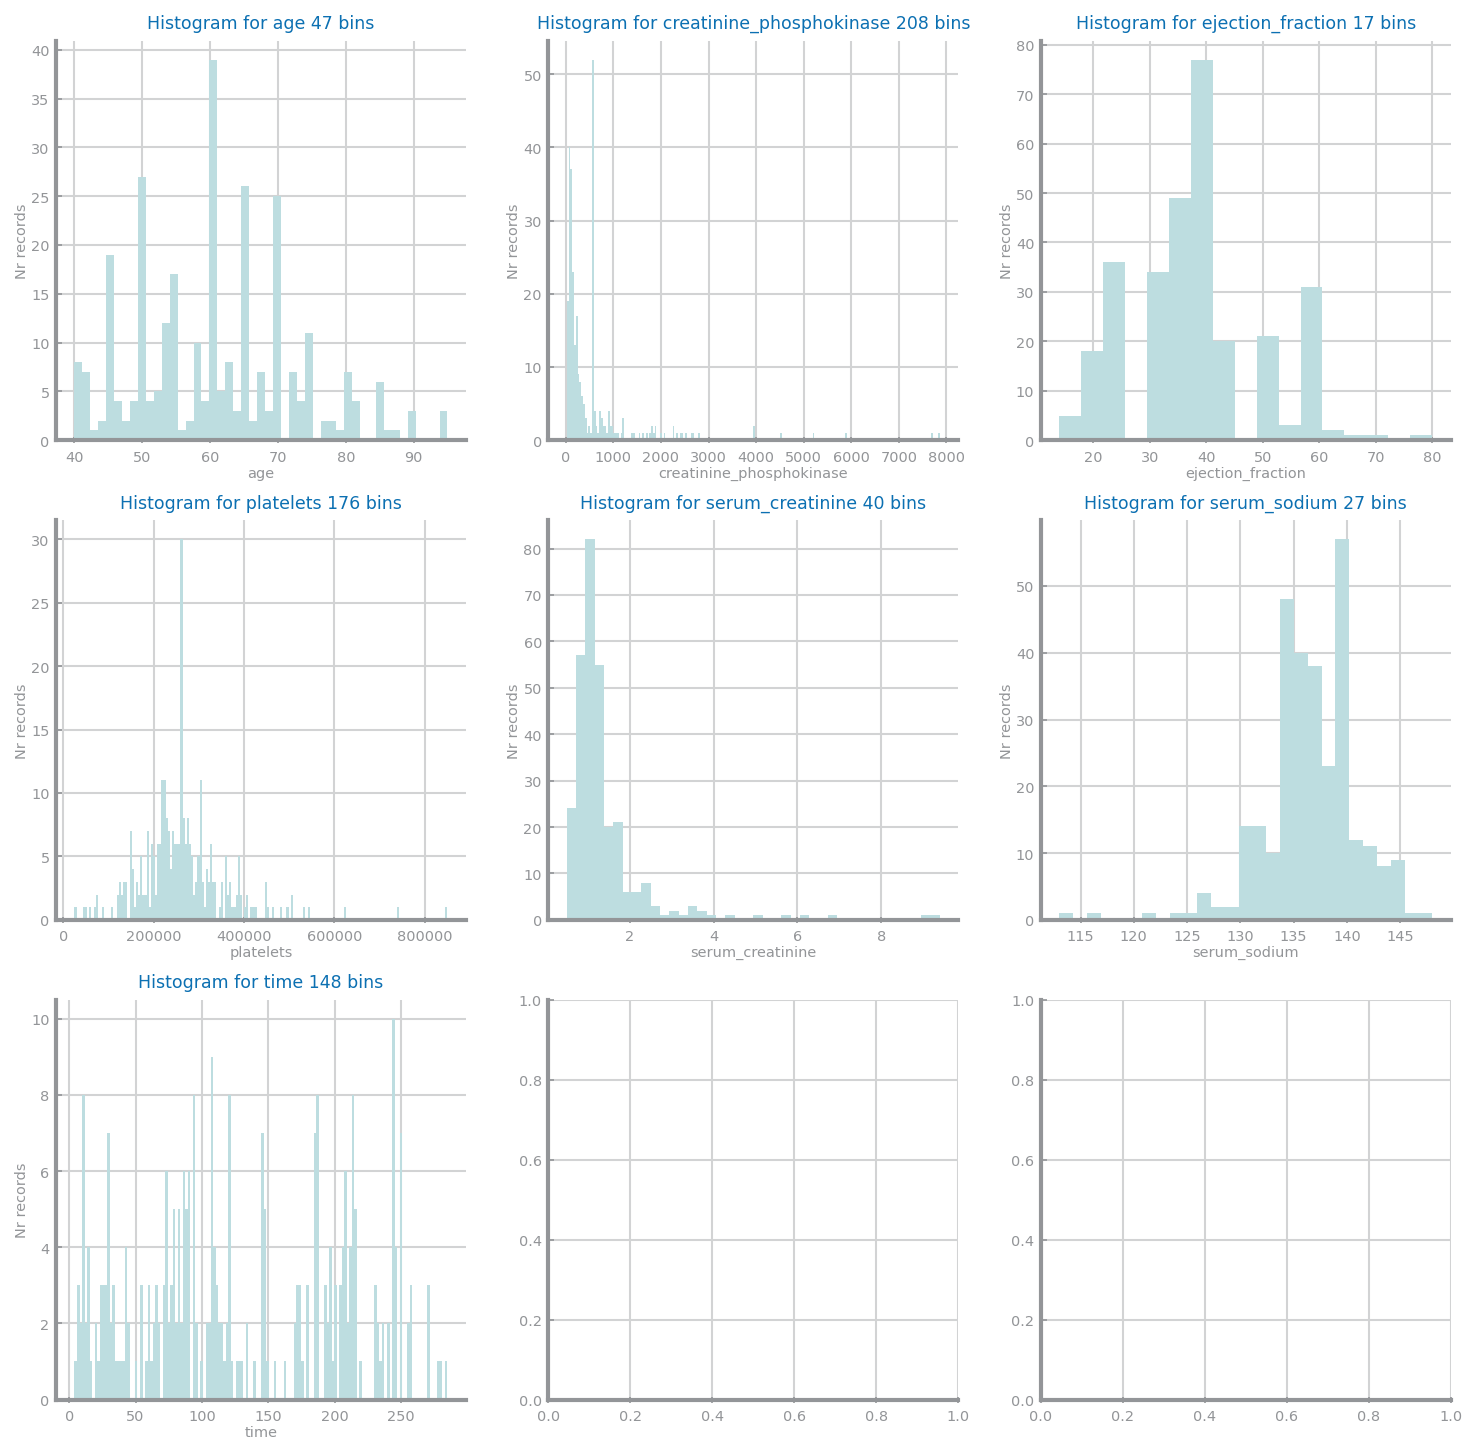

In [39]:
variables = data.select_dtypes(include='number').columns
rows, cols = ds.choose_grid(len(variables))
bins = data.select_dtypes(include='number').nunique()
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i,j = 0,0
for n in range(len(variables)):
    axs[i, j].set_title('Histogram for %s %d bins'%(variables[n], bins[n]))
    axs[i, j].set_xlabel(variables[n])
    axs[i, j].set_ylabel('Nr records')
    axs[i, j].hist(data[variables[n]].values, bins=bins[n])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

### Best granularity //TODO

---

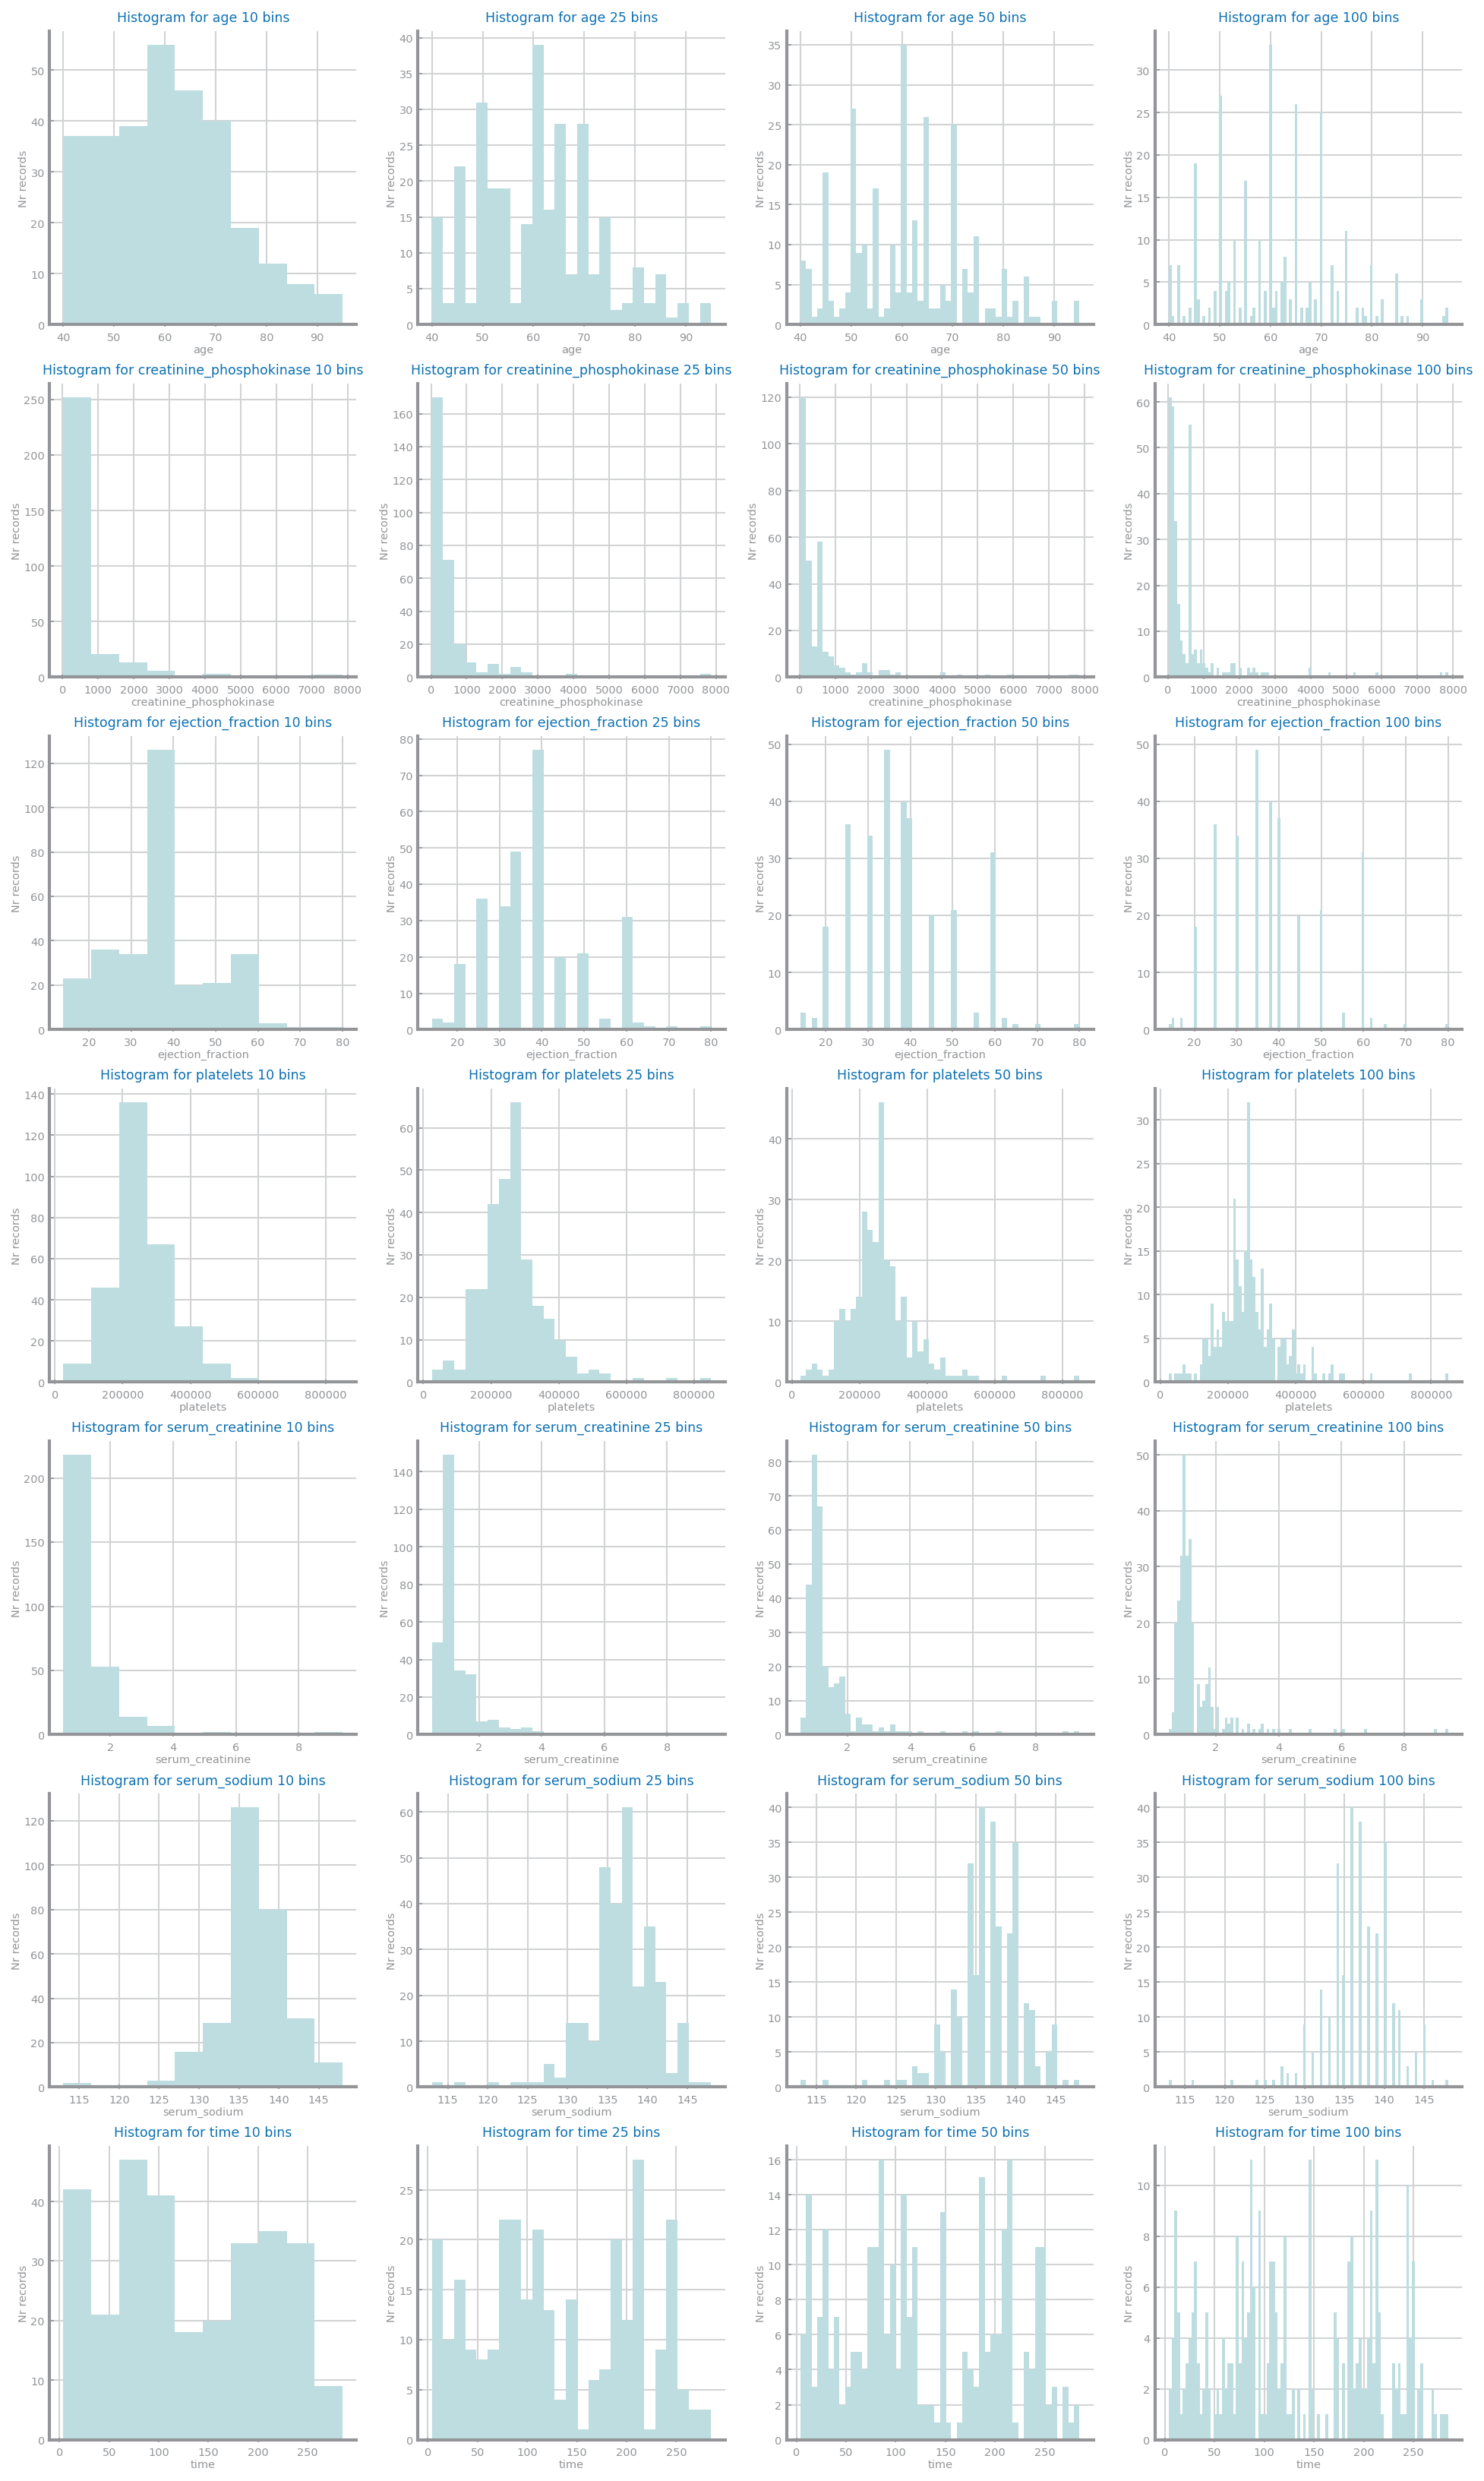

In [44]:
bins = (10, 25, 50, 100)
cols = len(bins)
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
for i in range(rows):
    for j in range(cols):
        axs[i, j].set_title('Histogram for %s %d bins'%(variables[i], bins[j]))
        axs[i, j].set_xlabel(variables[i])
        axs[i, j].set_ylabel('Nr records')
        axs[i, j].hist(data[variables[i]].values, bins=bins[j])
plt.show()

### Summary

---

***What is the most atomic granularity for each variable?***

It will be equal to the number of different values the each variable takes :
 


In [38]:
print(data.nunique())

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64


***What is the best granularity to discretize each numeric variable?***

The numeric variables we have are age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium and time. 

Based in the graphics above, we consider that the best granularity to discretize each numeric variable was: 


- For **age** and **serum sodium** **50**.


- For **creatinine_phosphokinase**, **ejection_fraction**, **platelets** and **serum_creatinine** **25**.


At those levels we could already start to predict the distribution (therefore values above those would be a waste of space) 


For **time**, we could not see a distribution for any of the number of bins we tried.

   
***Are there any hierarchy of concepts for symbolic variables, either from data or domain knowledge?***
    
**No**, there isn't any hierarchy of concepts for those symbolic variables.